<h4> Add Libraries and importing diabeties datasets

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import pandas as pd
import numpy as np

<h4>loading dataset

In [5]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

<h4> <u>Learn about Dataset:</u>
<p>
There are 4 attributes and all of them are numeric <br>
Prediction variable is class and it is a categorical variable of values Iris-Setosa,Iris-Versicolour,Iris-Virginica<br>
There are 50 in each class and total rows is 150<br>
There are no missing values<br>
</p>


In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<h4> 
creating DataFrame<br>
Adding columns names to the dataframe

In [8]:
df=pd.DataFrame(iris.data)
df.columns=iris.feature_names
df['target'] = iris['target']

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df['target'].unique()

array([0, 1, 2])

<h4> No Encoding required

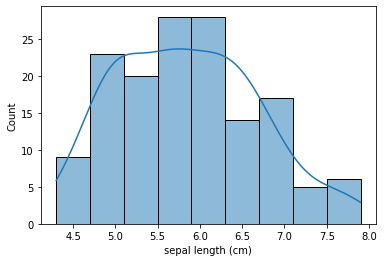

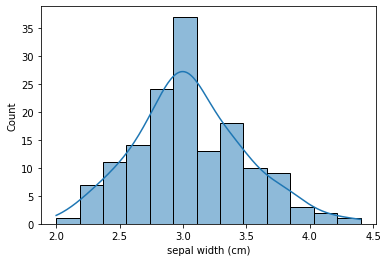

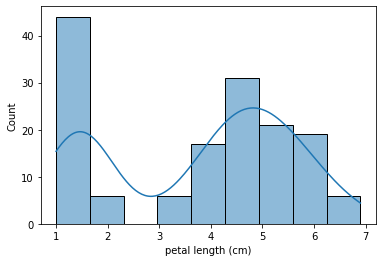

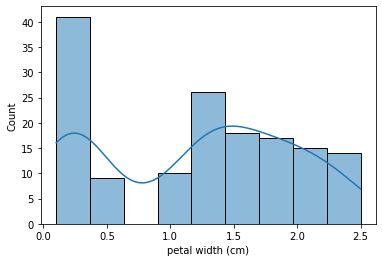

<Figure size 432x288 with 0 Axes>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in df.columns[:-1]:
    #print(col)
    #plt.xlabel(col)
    sns.histplot(df[col],kde=True)
    
    plt.figure()

<h4> The columns are not normalised. So we will perform scaling for all columns except for target variable

In [12]:
from sklearn.preprocessing import RobustScaler
def scaling(df):
    trans= RobustScaler()
    data=trans.fit_transform(df.iloc[:,:-1])
    df_stand= pd.DataFrame(data,columns=df.iloc[:,:-1].columns)
    #print(df_stand.head())
    return(df_stand)

In [13]:
df_norm=scaling(df)
df_norm['target']=df['target']

In [14]:
df_norm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.538462,1.0,-0.842857,-0.733333,0
1,-0.692308,0.0,-0.842857,-0.733333,0
2,-0.846154,0.4,-0.871429,-0.733333,0
3,-0.923077,0.2,-0.814286,-0.733333,0
4,-0.615385,1.2,-0.842857,-0.733333,0


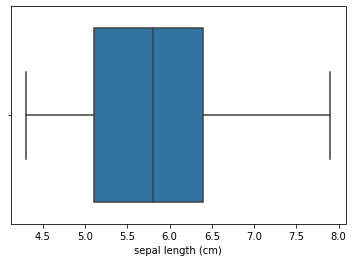

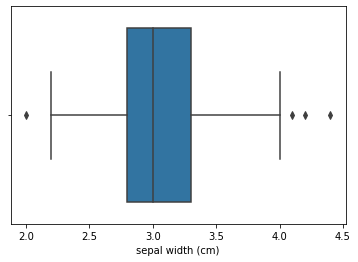

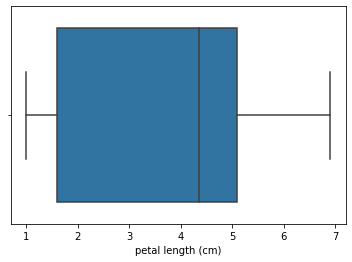

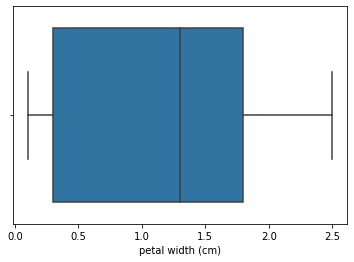

<Figure size 432x288 with 0 Axes>

In [15]:
for col in df.columns[:-1]:
    sns.boxplot(data=df,x=col)
    plt.figure()

<h4> There are not much outliers, so no treatment required

In [16]:
def logsitic_reg(df):
    regr_model=LogisticRegression()
    #x_train,x_test,y_train,y_test=np.array()
    x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1:].values,test_size=0.2,random_state=6)
    print('features',df.columns[:-1],'\n')
    print("Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train\t: ",df.shape,x_train.shape, x_test.shape,y_train.shape,y_test.shape)

    regr_model.fit(x_train, y_train)
    y_predict = regr_model.predict(x_test)
    
    acc = accuracy_score(y_predict,y_test)
    cm=confusion_matrix(y_predict,y_test)
    report=classification_report(y_test, y_predict, digits=3)

    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1','Predicted 2']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1',2:'Actual 2'})
    cm_df
    
    import matplotlib.pyplot as plt

    labels =['Class 0', 'Class 1', 'Class 2']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix ')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    
    print('accuracy:',acc)
    print(cm)
    print(cm_df)
    print(report)  
    

In [17]:
from sklearn.preprocessing import StandardScaler
def std_scale(df):
    trans= StandardScaler()
    data=trans.fit_transform(df.iloc[:,:-1])
    df_stand= pd.DataFrame(data,columns=df.iloc[:,:-1].columns)
    #print(df_stand.head())
    return(df_stand)

In [18]:
df_std=std_scale(df)
df_std['target']=df['target']

In [19]:
df_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


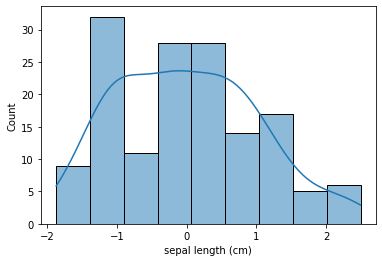

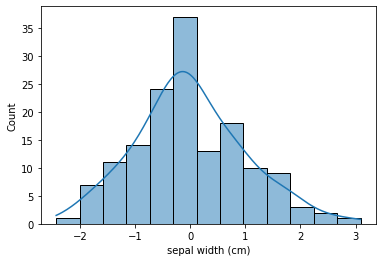

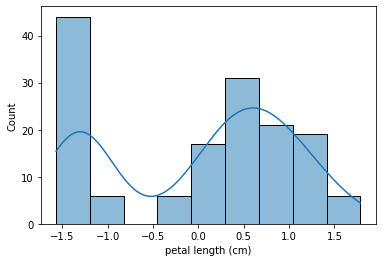

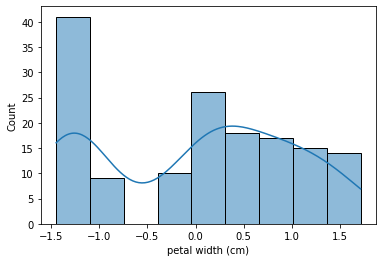

<Figure size 432x288 with 0 Axes>

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in df_std.columns[:-1]:
    #print(col)
    #plt.xlabel(col)
    sns.histplot(df_std[col],kde=True)
    
    plt.figure()

In [21]:
from sklearn.preprocessing import MinMaxScaler
def mm_scale(df):
    trans= MinMaxScaler()
    data=trans.fit_transform(df.iloc[:,:-1])
    df_stand= pd.DataFrame(data,columns=df.iloc[:,:-1].columns)
    #print(df_stand.head())
    return(df_stand)

In [22]:
df_mm=mm_scale(df)
df_mm['target']=df['target']

In [23]:
df_mm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


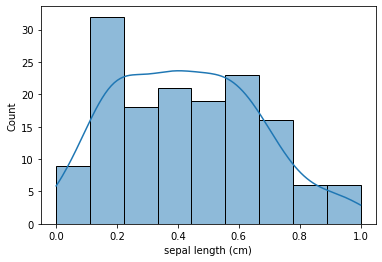

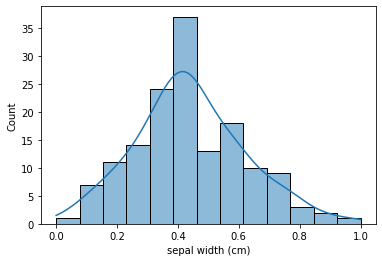

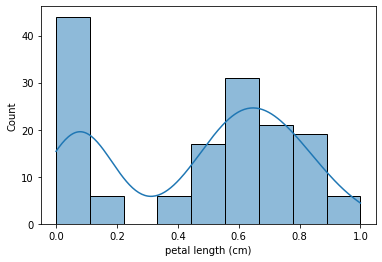

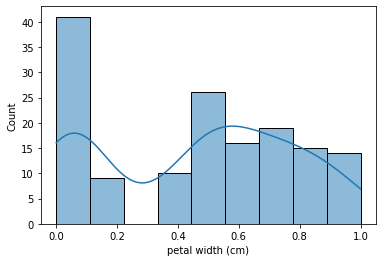

<Figure size 432x288 with 0 Axes>

In [24]:
for col in df_mm.columns[:-1]:
    #print(col)
    #plt.xlabel(col)
    sns.histplot(df_mm[col],kde=True)
    
    plt.figure()

features Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (150, 5) (120, 4) (30, 4) (120, 1) (30, 1)


C:\Users\91962\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-16-44f13a6d6a1d>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-16-44f13a6d6a1d>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


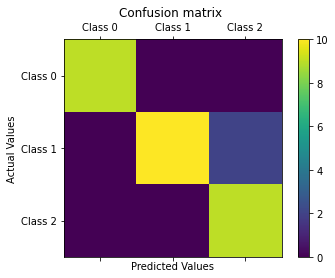

accuracy: 0.9333333333333333
[[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]
          Predicted 0  Predicted 1  Predicted 2
Actual 0            9            0            0
Actual 1            0           10            2
Actual 2            0            0            9
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      0.833     1.000     0.909        10
           2      1.000     0.818     0.900        11

    accuracy                          0.933        30
   macro avg      0.944     0.939     0.936        30
weighted avg      0.944     0.933     0.933        30



In [25]:
logsitic_reg(df_std)

<h1> Accuracy is 93.3 after standardization scaling

features Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (150, 5) (120, 4) (30, 4) (120, 1) (30, 1)


C:\Users\91962\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-16-44f13a6d6a1d>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-16-44f13a6d6a1d>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


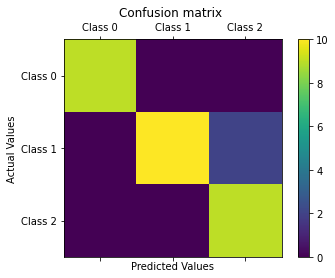

accuracy: 0.9333333333333333
[[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]
          Predicted 0  Predicted 1  Predicted 2
Actual 0            9            0            0
Actual 1            0           10            2
Actual 2            0            0            9
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      0.833     1.000     0.909        10
           2      1.000     0.818     0.900        11

    accuracy                          0.933        30
   macro avg      0.944     0.939     0.936        30
weighted avg      0.944     0.933     0.933        30



In [26]:
logsitic_reg(df_mm)

<h1> Accuracy is 93.3 after MinMax scaling

features Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (150, 5) (120, 4) (30, 4) (120, 1) (30, 1)


C:\Users\91962\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-16-44f13a6d6a1d>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-16-44f13a6d6a1d>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


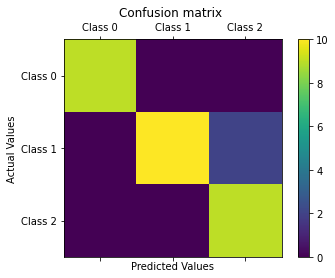

accuracy: 0.9333333333333333
[[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]
          Predicted 0  Predicted 1  Predicted 2
Actual 0            9            0            0
Actual 1            0           10            2
Actual 2            0            0            9
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      0.833     1.000     0.909        10
           2      1.000     0.818     0.900        11

    accuracy                          0.933        30
   macro avg      0.944     0.939     0.936        30
weighted avg      0.944     0.933     0.933        30



In [27]:
logsitic_reg(df_norm)

<h1> Accuracy is 93.3 after Robust scaling

features Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (150, 5) (120, 4) (30, 4) (120, 1) (30, 1)


C:\Users\91962\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91962\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-16-44f13a6d6a1d>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-16-44f13a6d6a1d>:29: UserWarn

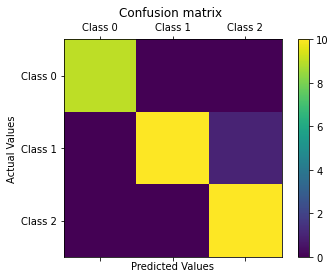

accuracy: 0.9666666666666667
[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]
          Predicted 0  Predicted 1  Predicted 2
Actual 0            9            0            0
Actual 1            0           10            1
Actual 2            0            0           10
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      0.909     1.000     0.952        10
           2      1.000     0.909     0.952        11

    accuracy                          0.967        30
   macro avg      0.970     0.970     0.968        30
weighted avg      0.970     0.967     0.967        30



In [28]:
logsitic_reg(df)

<h1>
Accuracy =96.7%

Precesion for 0-type:100% <br>
Precesion for 1-type:90.9%<br>
Precesion for 2-type:100%<br>

Recall for 0-type:100% <br>
Recall for 1-type:100%<br>
Recall for 2-type:90.9%<br>

In [29]:
def multi_reg(df):
    regr_model=LogisticRegression(multi_class='multinomial', solver='lbfgs')
    #x_train,x_test,y_train,y_test=np.array()
    x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1:].values,test_size=0.2,random_state=6)
    print('features',df.columns[:-1],'\n')
    print("Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train\t: ",df.shape,x_train.shape, x_test.shape,y_train.shape,y_test.shape)

    regr_model.fit(x_train, y_train)
    y_predict = regr_model.predict(x_test)
    
    acc = accuracy_score(y_predict,y_test)
    cm=confusion_matrix(y_predict,y_test)
    report=classification_report(y_test, y_predict, digits=3)

    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1','Predicted 2']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1',2:'Actual 2'})
    cm_df
    
    import matplotlib.pyplot as plt

    labels =['Class 0', 'Class 1', 'Class 2']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix ')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    
    print('accuracy:',acc)
    print(cm)
    print(cm_df)
    print(report)  
    

features Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (150, 5) (120, 4) (30, 4) (120, 1) (30, 1)


C:\Users\91962\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\91962\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-29-4f6f4b3c4826>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-29-4f6f4b3c4826>:29: UserWarn

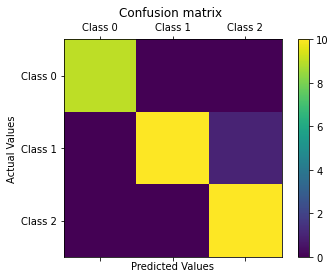

accuracy: 0.9666666666666667
[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]
          Predicted 0  Predicted 1  Predicted 2
Actual 0            9            0            0
Actual 1            0           10            1
Actual 2            0            0           10
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      0.909     1.000     0.952        10
           2      1.000     0.909     0.952        11

    accuracy                          0.967        30
   macro avg      0.970     0.970     0.968        30
weighted avg      0.970     0.967     0.967        30



In [30]:
multi_reg(df)